In [37]:
from astroquery.simbad import Simbad

In [38]:
theta1c = Simbad.query_object('tet01 Ori C')

In [39]:
theta1c.pprint()

   MAIN_ID          RA           DEC      ... COO_WAVELENGTH     COO_BIBCODE    
                 "h:m:s"       "d:m:s"    ...                                   
------------- ------------- ------------- ... -------------- -------------------
* tet01 Ori C 05 35 16.4637 -05 23 22.848 ...              O 2007A&A...474..653V


In [40]:
from astroquery.sdss import SDSS

In [41]:
from astropy import coordinates as coords

In [42]:
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')

In [43]:
xid = SDSS.query_region(pos, spectro=True)

/srv/conda/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [44]:
xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d,instrument
float64,float64,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64,int64,bytes4
2.02344596303101,14.8398237521302,1237652943176138868,1739,301,3,315,0.04559058,751,52251,160,845594848269461504,26,SDSS


In [45]:
im = SDSS.get_images(matches=xid, band='g')

In [73]:
sp = SDSS.get_spectra(matches=xid)

In [52]:
data =im[0][0].data

In [53]:
import numpy as np

In [54]:
np.shape(data)

(1489, 2048)

In [55]:
import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt # this is the only line required to make plots with matplotlibt

# this line allows you to see the plot inside the notebook
%matplotlib inline 

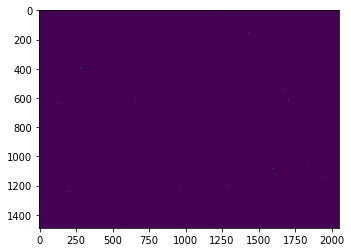

In [72]:
plt.imshow(data)

In [64]:
data.max(), data.min()

(176.75, -0.09118652)

In [87]:
data = sp[0][1].data

In [88]:
np.shape(data)

(3841,)

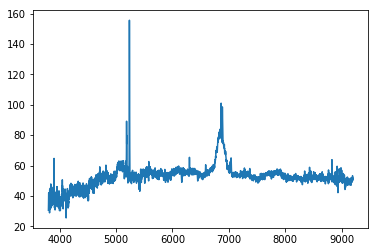

In [95]:
plt.plot(10**data['loglam'], data['flux'])

In [93]:
data['loglam']

array([3.5797, 3.5798, 3.5799, ..., 3.9635, 3.9636, 3.9637], dtype=float32)